# `unifhy` exercise 1 (a solution)

For this exercise, you may find useful information in the [online documentation](https://unifhy-org.github.io/unifhy)

1. Import the framework

In [1]:
import unifhy

2. Reload your model from the demo run using [`unifhy.Model.from_yaml(...)`](https://unifhy-org.github.io/unifhy/api/methods/unifhy.Model.from_yaml.html#unifhy.Model.from_yaml)

   (__hint:__ your YAML configuration file should be found in *../outputs* and named *demo-run.yml*)

In [2]:
model = unifhy.Model.from_yaml('../outputs/demo-run.yml')

3. Access the openwater component of the model through the `openwater` attribute of your model object, and use its `parameters` attribute to assign a new dictionary containing the new parameter values and units (i.e. `model.openwater.parameters = ...`)

   (__hint:__ re-use the dictionary containing parameter values and units used in the creation of our openwater component in the demo run)
   
   (__note:__ the wave speed parameters of the RFM component are [highly dependent on model resolution](https://jules-lsm.github.io/latest/namelists/jules_rivers.nml.html#JULES_RIVERS::cland), if you want to change these, proceed with caution)
   
   (__hint:__ why not changing the *ret_r* parameter to a slightly larger value, say 0.01)

In [3]:
model.openwater.parameters = {
    'c_land': (0.20, 'm s-1'),
    'cb_land': (0.10, 'm s-1'),
    'c_river': (0.62, 'm s-1'),
    'cb_river': (0.15, 'm s-1'),
    'ret_l': (0.0, '1'),
    'ret_r': (0.01, '1'),
    'routing_length': (50000, 'm')
}

4. Change the identifier for your model to __something different__ from the one of your demo run using the `identifier` attribute of your model

In [4]:
model.identifier = 'diff-param-run'

5. Spin up your model for one cycle for the calendar year 2015

In [5]:
from datetime import datetime, timedelta
model.spin_up(
    start=datetime(2015, 1, 1, 0, 0, 0),
    end=datetime(2016, 1, 1, 0, 0, 0),
    cycles=1
)

6. Start your model simulation

In [6]:
model.simulate()

7. Using the `cf` package, load the *outgoing_water_volume_transport_along_river_channel* from the openwater component output of your __demo run__

   (__hint:__ you have done this step before in the demo)

In [7]:
import cf

flow1 = cf.read('../outputs/demo-run_openwater_run_records_daily.nc')[0]

8. Using the `cf` package, load the *outgoing_water_volume_transport_along_river_channel* from the openwater component output of the __run you've just completed__

In [8]:
flow2 = cf.read('../outputs/diff-param-run_openwater_run_records_daily.nc')[0]

9. Using the `cfplot` package, compare the two outputs above at coordinates (52.75 degrees North, 0.25 degrees South) on a lineplot

   (__hint:__ remember to ask matplotlib to show plots inline)

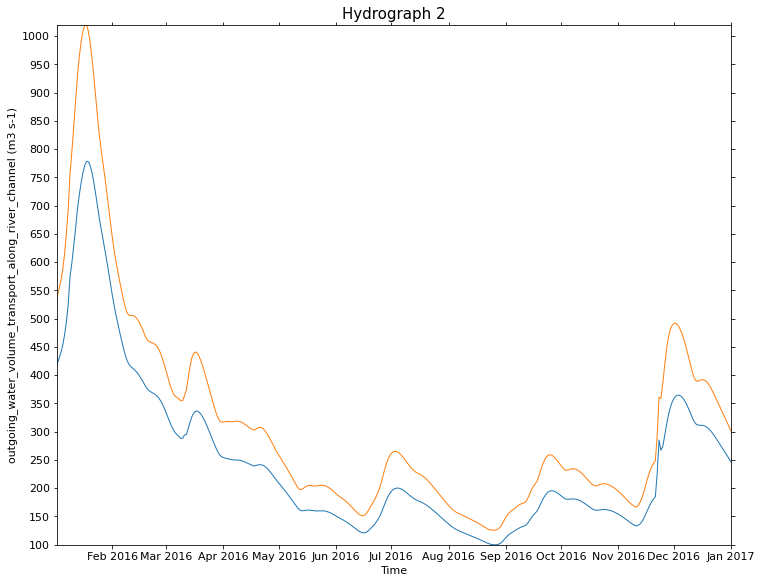

In [9]:
import cfplot

%matplotlib inline

cfplot.gopen()
cfplot.lineplot(flow1.subspace(Y=52.75, X=0.25), title='Hydrograph 1')
cfplot.lineplot(flow2.subspace(Y=52.75, X=0.25), title='Hydrograph 2')
cfplot.gclose()

10. Close the files you've opened

In [10]:
flow1.close()
flow2.close()